# Exploración de datos/ Ingeniería de características

# Librerías

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Carga de datos

In [42]:
dataframe = pd.read_csv("dataset_feature_engineering.csv")
print("Dimensiones:", dataframe.shape)
dataframe.head()

Dimensiones: (1852394, 35)


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [57]:
dataframe.info()
dataframe.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

cc_num                             0
dist_between_client_and_merch      0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
trans_month                        0
merch_lat                          0
trans_day                          0
hour                               0
year                               0
times_shopped_at_merchant          0
times_shopped_at_merchant_year     0
times_shopped_at_merchant_month    0
merch_long                         0
unix_time                          0
merchant                           0
city                               0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
state                              0
t

In [43]:
dataframe['cc_num'] = dataframe['cc_num'].astype(str)
dataframe['zip'] = dataframe['zip'].astype(str)
dataframe['dob'] = pd.to_datetime(dataframe['dob'], errors='coerce')
dataframe['is_fraud'] = dataframe['is_fraud'].astype(bool)
dataframe['first_time_at_merchant'] = dataframe['first_time_at_merchant'].astype(bool)

#columnas categoricas
categoricalCols = ['merchant', 'category', 'gender', 'state', 'job', 'city']
dataframe[categoricalCols] = dataframe[categoricalCols].astype('category')

#columnas numericas
numericIntCols = ['city_pop', 'trans_month', 'trans_day', 'hour', 'year',
            'times_shopped_at_merchant', 'times_shopped_at_merchant_year',
            'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day']
dataframe[numericIntCols] = dataframe[numericIntCols].astype('Int64')
numericFloatCols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long',
              'amt_month', 'amt_year', 'amt_month_shopping_net_spend',
              'dist_between_client_and_merch']
dataframe[numericFloatCols] = dataframe[numericFloatCols].astype(float)

In [59]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   cc_num                           object        
 1   merchant                         category      
 2   category                         category      
 3   amt                              float64       
 4   first                            object        
 5   last                             object        
 6   gender                           category      
 7   street                           object        
 8   city                             category      
 9   state                            category      
 10  zip                              object        
 11  lat                              float64       
 12  long                             float64       
 13  city_pop                         Int64         
 14  job                              c

In [60]:
dataframe.describe(include='all')

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1852394,1852394,1852394,1.852394e+06,1852394,1852394,1852394,1852394,1852394,1852394,...,1852394,1.852394e+06,1852394.0,1852394.0,1852394.0,1852394.0,1852394.0,1852394.0,1852394.0,1852394.0
unique,999,693,14,NaN,355,486,2,999,906,51,...,2,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
top,6538441737335434,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,...,False,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
freq,4392,6262,188029,NaN,38112,40940,1014749,4392,8040,135269,...,1323066,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
mean,NaN,NaN,NaN,7.006357e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.610956e+01,7.152067,2.967456,12.806119,2019.500727,5.298079,3.150459,1.389109,1.655442
min,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.227351e-02,1.0,0.0,0.0,2019.0,1.0,1.0,1.0,1.0
25%,NaN,NaN,NaN,9.640000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.534198e+01,4.0,1.0,7.0,2019.0,3.0,2.0,1.0,1.0
50%,NaN,NaN,NaN,4.745000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.824823e+01,7.0,3.0,14.0,2020.0,5.0,3.0,1.0,1.0
75%,NaN,NaN,NaN,8.310000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.847204e+01,10.0,5.0,19.0,2020.0,7.0,4.0,2.0,2.0
max,NaN,NaN,NaN,2.894890e+04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.518682e+02,12.0,6.0,23.0,2020.0,28.0,17.0,9.0,9.0


# EDA

## Distribución en la variable objetivo

            count  percentage
is_fraud                     
False     1842743   99.478999
True         9651    0.521001


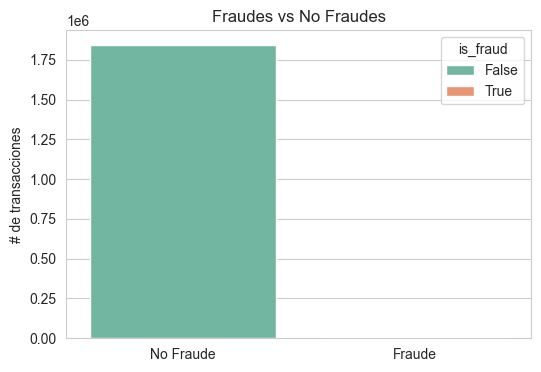

In [61]:
ClassCounts = dataframe['is_fraud'].value_counts()
ClassPercentages = dataframe['is_fraud'].value_counts(normalize=True) * 100

print(pd.concat([ClassCounts, ClassPercentages.rename('percentage')], axis=1))

sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=dataframe, palette='Set2', hue='is_fraud')
plt.title("Fraudes vs No Fraudes")
plt.xticks([0,1], ['No Fraude', 'Fraude'])
plt.ylabel("# de transacciones")
plt.xlabel("")
plt.show()

Viendo la distribución de la variable objetivo, no es de extrañar que los modelos entrenados con este dataset tengan muchos falsos positivos. Pues la variable está exageradamente desbalanceada, es un 99.48% vs 0.52%, haciendo que cualquier modelo sin buenos parámetros favorezcan a una clase. Además, que con un dataset así, las métricas serán engañosas. Ya que aunque cuente con una precisión alta, esto será porque está clasificando a todos como un "No fraude", y como así es la mayoría, la probabilidad que haya acertado es alta, haciendo que las métricas no sean confiables.

## Distribución en montos

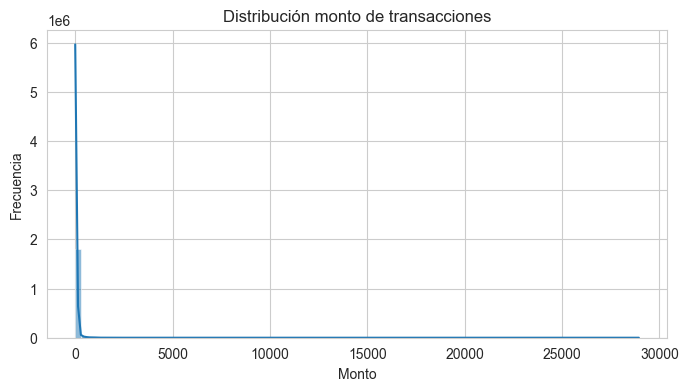

In [62]:
plt.figure(figsize=(8,4))
sns.histplot(data=dataframe, x='amt', bins=100, kde=True)
plt.title("Distribución monto de transacciones")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
#plt.xlim(0, 500)
plt.show()

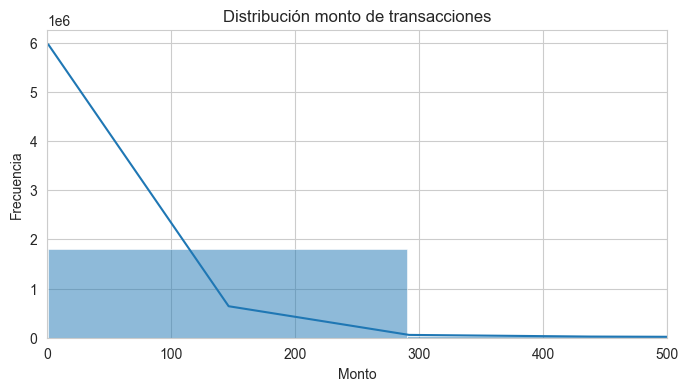

In [63]:
plt.figure(figsize=(8,4))
sns.histplot(data=dataframe, x='amt', bins=100, kde=True)
plt.title("Distribución monto de transacciones")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.xlim(0, 500)
plt.show()

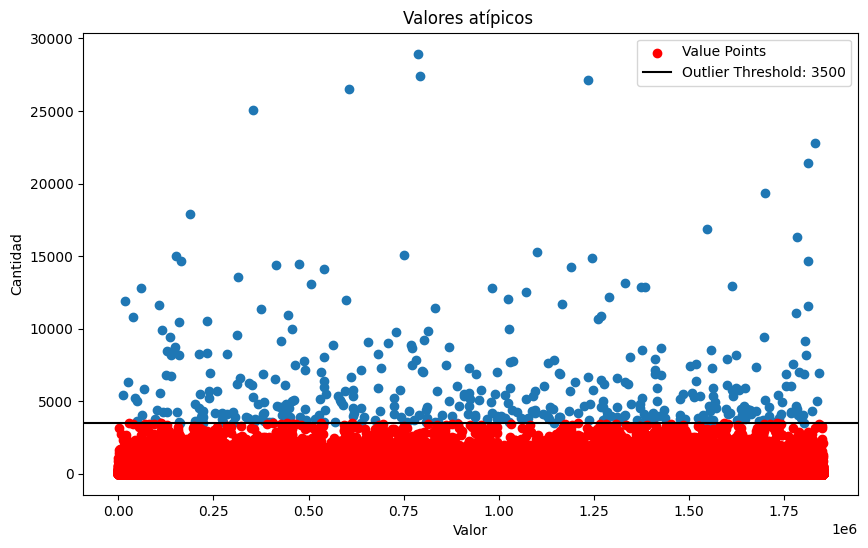

# of outliers: 386
Outlier % 0.02083789949654339


In [ ]:
outlierThreshold = 3500
outliers = dataframe.amt > outlierThreshold
outlierCount = np.count_nonzero(outliers)
totalCount = len(dataframe)
outlierPer = (outlierCount / totalCount) * 100

plt.figure(figsize=(10, 6))
plt.scatter(dataframe.index[outliers], dataframe.amt[outliers])
plt.scatter(dataframe.index[~outliers], dataframe.amt[~outliers], color='red', label='Value Points')
plt.axhline(y=outlierThreshold, color='black', linestyle='-', label=f'Outlier Threshold: {outlierThreshold}')
plt.title('Valores atípicos ')
plt.xlabel('Valor')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

print(f'# of outliers: {outlierCount}')
print(f'Outlier % {outlierPer}')

Al observar que la variable "importante" (NO OBJETIVO) tiene poco valores atípicos, se decidió eliminar esos registros ya que no representan una cantidad significativa por lo que no afectará el entrenamiento del modelo. Decidí colocar el threshold en 3500 ya que allí es donde los datos empiezan a dispersarse más y más, y queremos que sean más concentrados para que el modelo pueda llegar a clasificar correctamente las transacciones. 

In [44]:
dataframe = dataframe[~outliers]

## Caja y bigotes para variable objetivo

C:\Users\ealva\AppData\Local\Temp\ipykernel_18660\3266903531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='is_fraud', y='amt', palette='Set1')


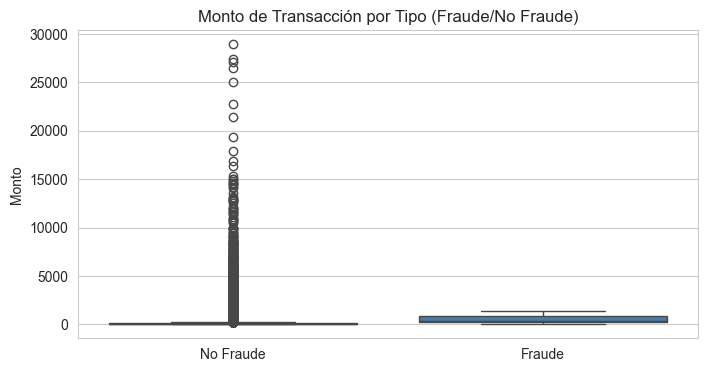

In [64]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dataframe, x='is_fraud', y='amt', palette='Set1')
plt.title("Monto de Transacción por Tipo (Fraude/No Fraude)")
plt.xticks([0,1], ['No Fraude', 'Fraude'])
plt.xlabel("")
plt.ylabel("Monto")
#plt.ylim(0, 500)
plt.show()

## Caja y bigotes para variables amt, amt_month y amt_year

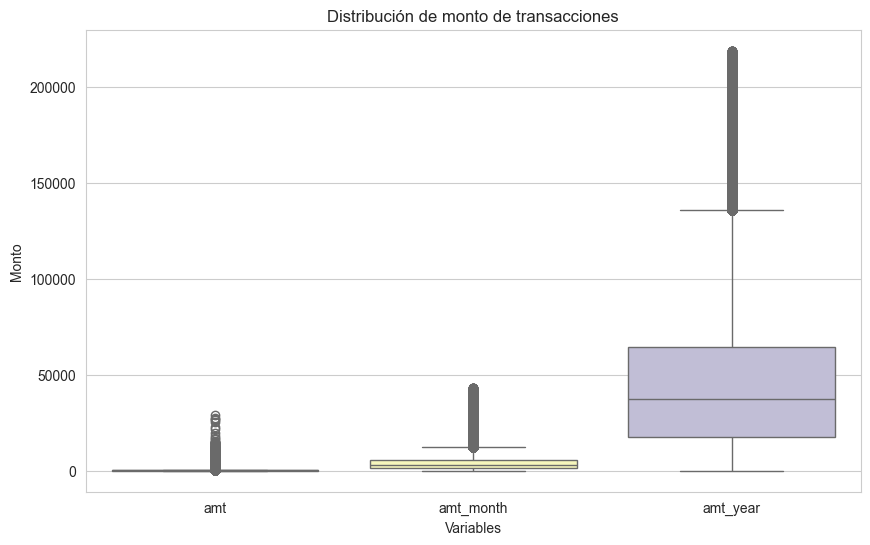

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe[['amt', 'amt_month', 'amt_year']], palette='Set3')
plt.title("Distribución de monto de transacciones")
plt.ylabel("Monto")
plt.xlabel("Variables")
plt.show()

## Correlación entre variables

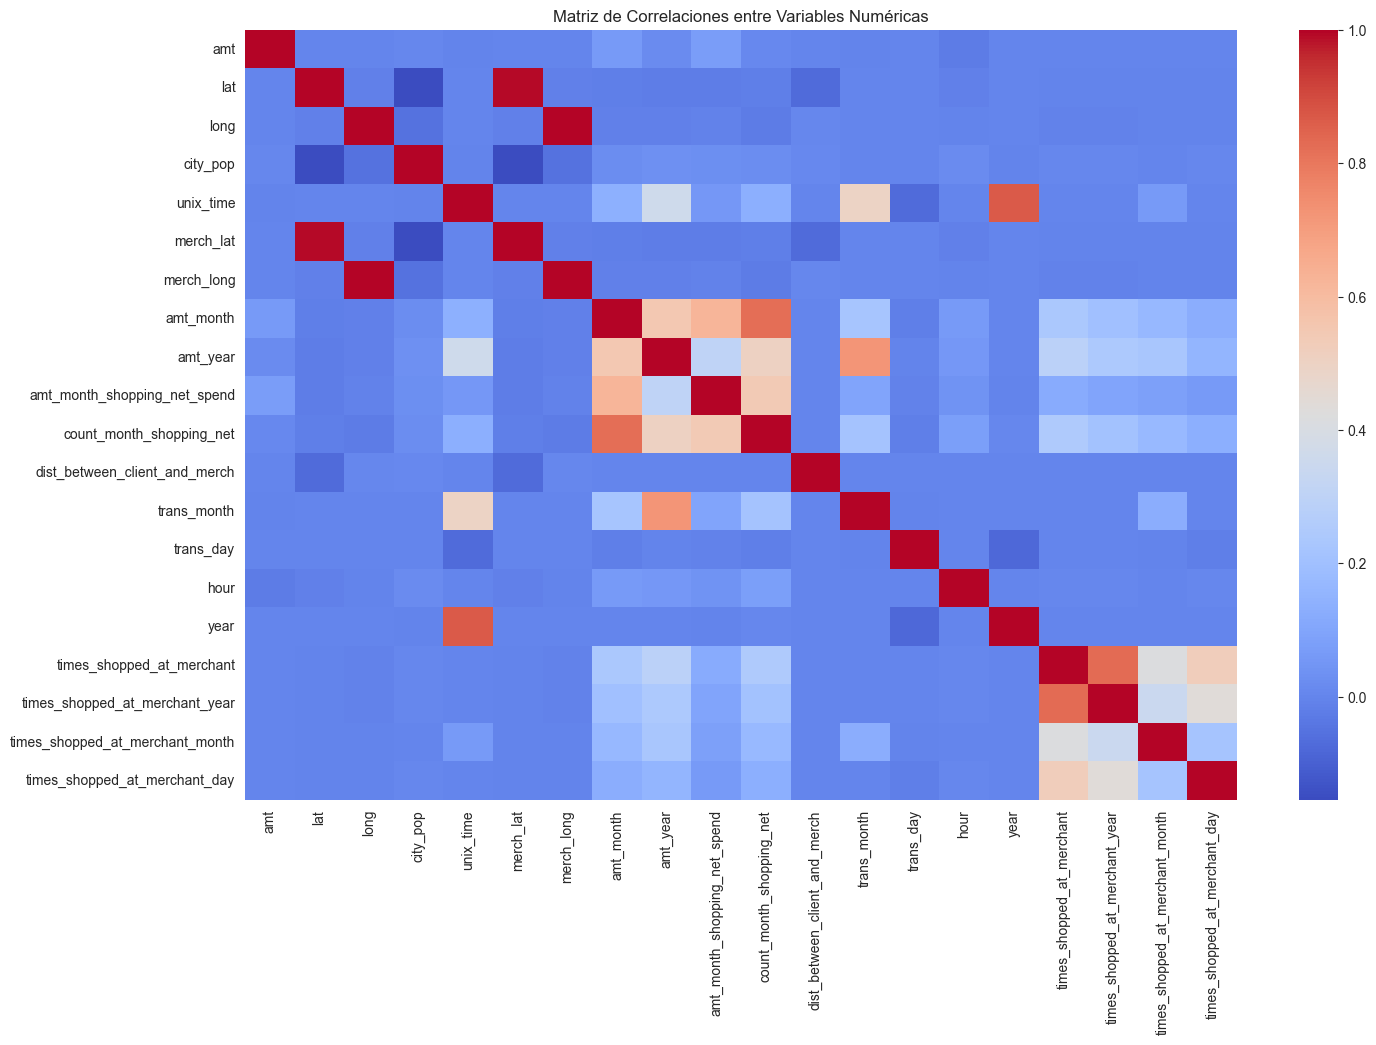

In [66]:
numericFeatures = dataframe.select_dtypes(include=[np.number]).columns.tolist()
correlationMatrix = dataframe[numericFeatures].corr()

plt.figure(figsize=(16,10))
sns.heatmap(correlationMatrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Matriz de Correlaciones entre Variables Numéricas")
plt.show()

## Categorías más populares

C:\Users\ealva\AppData\Local\Temp\ipykernel_18660\128009129.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=CategoryCounts.values, y=CategoryCounts.index, palette='viridis', order=CategoryCounts.index)


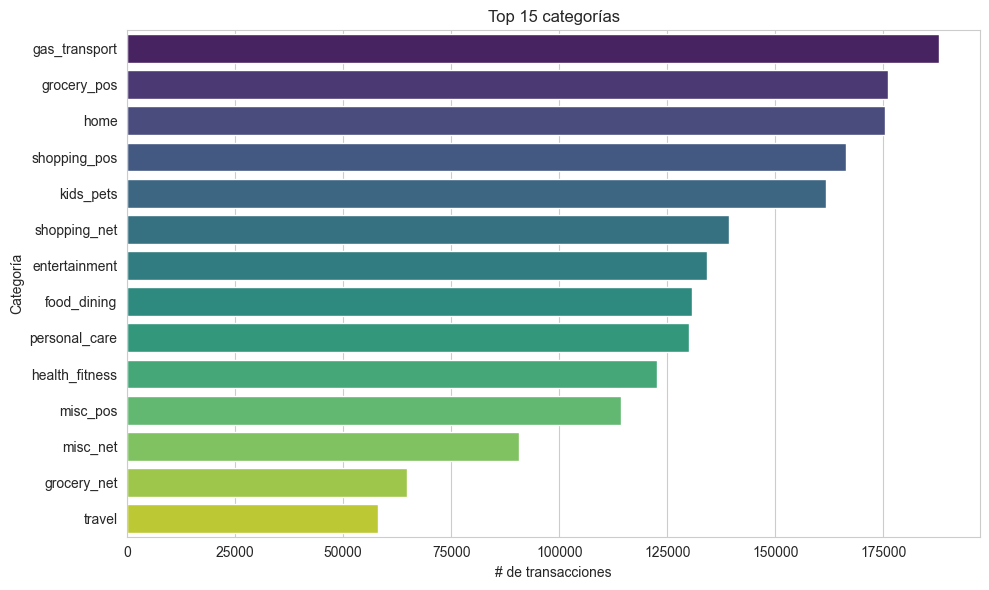

In [67]:
plt.figure(figsize=(10,6))
CategoryCounts = dataframe['category'].value_counts().sort_values(ascending=False)

sns.barplot(x=CategoryCounts.values, y=CategoryCounts.index, palette='viridis', order=CategoryCounts.index)
plt.title("Top 15 categorías")
plt.xlabel("# de transacciones")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

## Monto de transacción promedio por categoría

C:\Users\ealva\AppData\Local\Temp\ipykernel_18660\3784709635.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avgAmountByCategory = dataframe.groupby('category').amt.mean().sort_values(ascending=False).head(15)


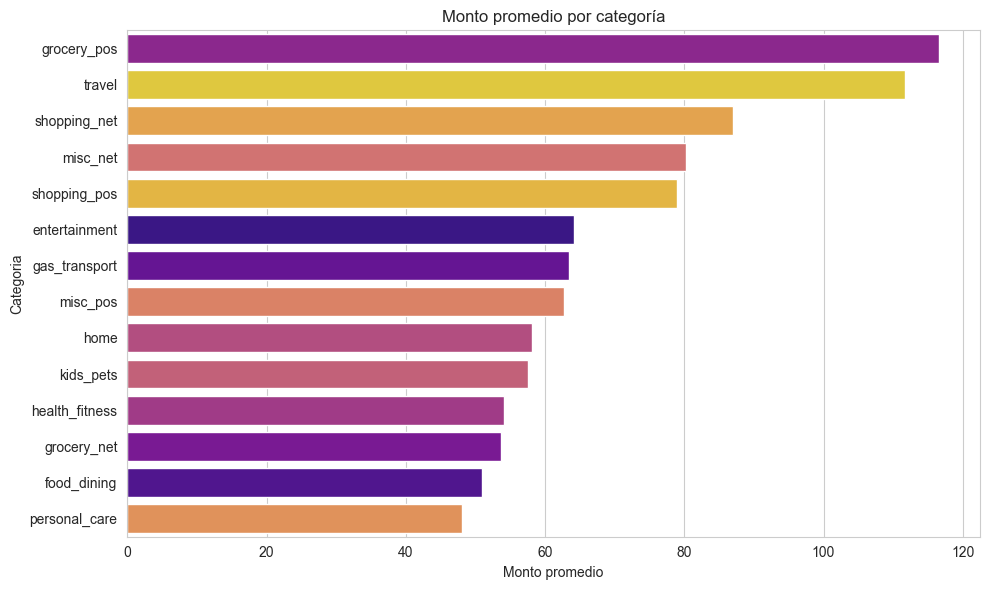

In [68]:
plt.figure(figsize=(10,6))
avgAmountByCategory = dataframe.groupby('category').amt.mean().sort_values(ascending=False).head(15)

sns.barplot(x=avgAmountByCategory.values, y=avgAmountByCategory.index, palette='plasma', order=avgAmountByCategory.index, hue=avgAmountByCategory.index)
plt.title("Monto promedio por categoría")
plt.xlabel("Monto promedio")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()

## Monto promedio de transacción por categoría en fraudes

C:\Users\ealva\AppData\Local\Temp\ipykernel_18660\1640144943.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avgAmountByCategory = dataframe[dataframe.is_fraud].groupby('category').amt.mean().sort_values(ascending=False).head(15)


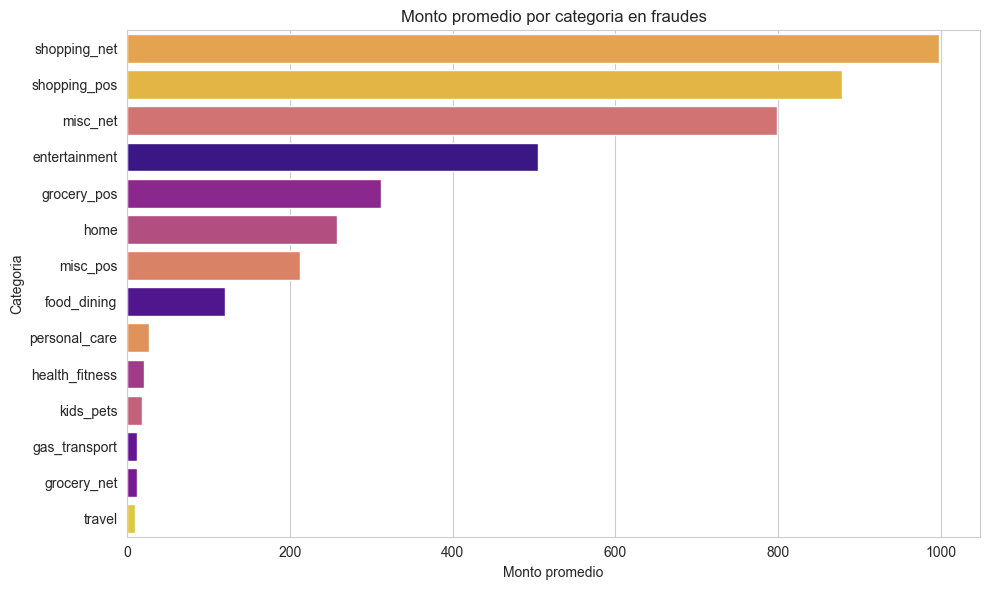

In [69]:
plt.figure(figsize=(10,6))
avgAmountByCategory = dataframe[dataframe.is_fraud].groupby('category').amt.mean().sort_values(ascending=False).head(15)

sns.barplot(x=avgAmountByCategory.values, y=avgAmountByCategory.index, palette='plasma', order=avgAmountByCategory.index, hue=avgAmountByCategory.index)
plt.title("Monto promedio por categoria en fraudes")
plt.xlabel("Monto promedio")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()

## Tasa de fraudes por categoría

C:\Users\ealva\AppData\Local\Temp\ipykernel_18660\530765989.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratioByCategory = dataframe.groupby('category').is_fraud.mean().sort_values(ascending=False).head(15)


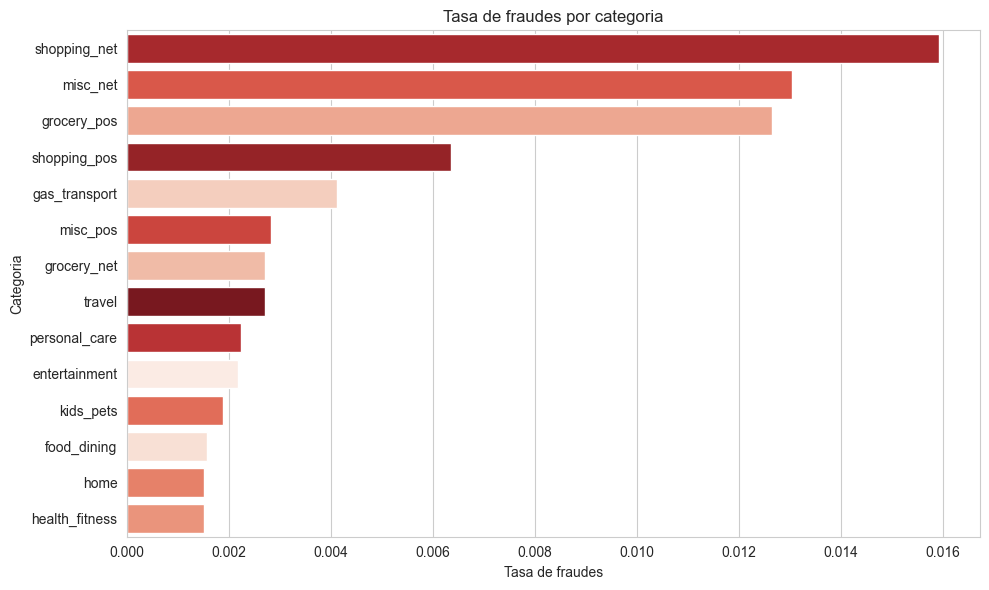

In [89]:
plt.figure(figsize=(10,6))
ratioByCategory = dataframe.groupby('category').is_fraud.mean().sort_values(ascending=False).head(15)

sns.barplot(x=ratioByCategory.values, y=ratioByCategory.index, palette='Reds', order=ratioByCategory.index, hue=ratioByCategory.index)
plt.title("Tasa de fraudes por categoria")
plt.xlabel("Tasa de fraudes")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()

## Tasa de fraudes por estado

C:\Users\ealva\AppData\Local\Temp\ipykernel_18660\2927643354.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratioByState = dataframe.groupby('state').is_fraud.mean().sort_values(ascending=False).head(15)
C:\Users\ealva\AppData\Local\Temp\ipykernel_18660\2927643354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratioByState.values, y=ratioByState.index, palette='Oranges', order=ratioByState.index)


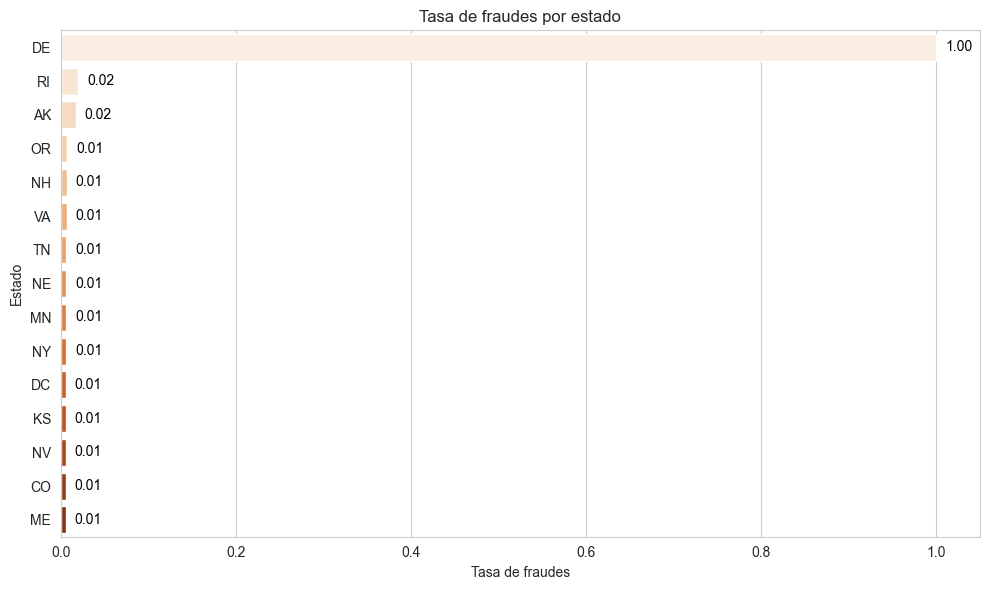

In [90]:
plt.figure(figsize=(10,6))
ratioByState = dataframe.groupby('state').is_fraud.mean().sort_values(ascending=False).head(15)

sns.barplot(x=ratioByState.values, y=ratioByState.index, palette='Oranges', order=ratioByState.index)
plt.title("Tasa de fraudes por estado")
plt.xlabel("Tasa de fraudes")
plt.ylabel("Estado")
plt.tight_layout()
for i, v in enumerate(ratioByState.values):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')
plt.show()

Curioso, como el estado Delaware (DE) tiene un ratio de 1.0, lo que indica que toda transacción realizada allí que se encuentra en el dataset fue un fraude.

In [72]:
dataframe[dataframe.state == 'DE']

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
233631,6011826317034777,fraud_Schamberger-O'Keefe,grocery_pos,294.91,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,...,True,65.396795,4,6,0,2019,1,1,1,1
233744,6011826317034777,fraud_Kuphal-Predovic,misc_net,868.29,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,...,True,53.251430,4,6,1,2019,1,1,1,1
233826,6011826317034777,fraud_Goodwin-Nitzsche,grocery_pos,280.26,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,...,True,83.034776,4,6,2,2019,1,1,1,1
234625,6011826317034777,"fraud_Huel, Hammes and Witting",grocery_pos,296.25,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,...,True,56.372000,4,6,10,2019,1,1,1,1
236522,6011826317034777,fraud_Waters-Cruickshank,health_fitness,20.58,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,...,True,53.747143,4,6,23,2019,1,1,1,1
236643,6011826317034777,fraud_Cormier LLC,shopping_net,1012.77,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,...,True,102.831659,4,6,23,2019,1,1,1,1
237095,6011826317034777,fraud_Ruecker Group,misc_net,885.96,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,...,True,137.752432,4,0,3,2019,1,1,1,1
237740,6011826317034777,fraud_Smitham-Schiller,grocery_net,10.93,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,...,True,124.132369,4,0,10,2019,1,1,1,1
239854,6011826317034777,"fraud_Baumbach, Feeney and Morar",shopping_net,960.49,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,DE,...,True,45.717438,4,0,23,2019,1,1,1,1


todas fueron realizadas con la misma tarjeta, el mismo día y a distintas horas. Aunque la mayoría fue a las 23 horas.

## Fraudes por hora

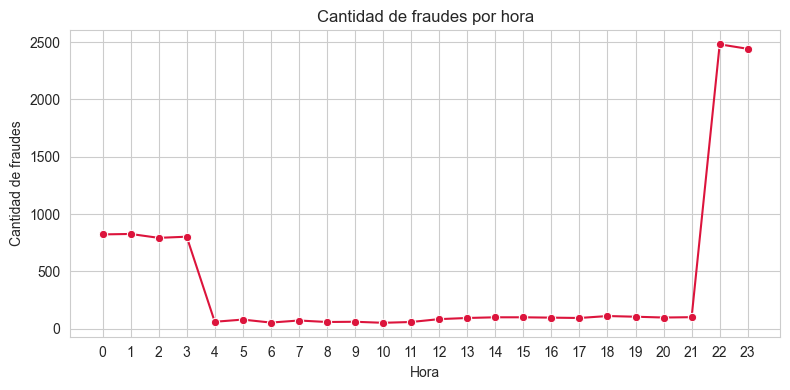

In [73]:
fraudByHour = dataframe[dataframe['is_fraud'] == True].groupby('hour').size()

plt.figure(figsize=(8,4))
sns.lineplot(x=fraudByHour.index, y=fraudByHour.values, marker='o', color='crimson')
plt.title("Cantidad de fraudes por hora")
plt.xlabel("Hora")
plt.ylabel("Cantidad de fraudes")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Ingeniería de características

## Nuevas features

### Frecuencia de transacciones por usuario por mes, día y hora

Considero que esta nueva feature traerá consigo información importante para casos como cuando el usuario realiza más transacciones que las usuales

In [45]:
dataframe['trans_date'] = pd.to_datetime(dataframe['unix_time'], unit='s')

dataframe['trans_per_day'] = dataframe.groupby(['cc_num', dataframe['trans_date'].dt.date])['unix_time'].transform('count')
dataframe['trans_per_hour'] = dataframe.groupby(['cc_num', dataframe['trans_date'].dt.date, dataframe['trans_date'].dt.hour])['unix_time'].transform('count')
dataframe['trans_per_month'] = dataframe.groupby(['cc_num', dataframe['trans_date'].dt.to_period('M')])['unix_time'].transform('count')

# eliminar trans_date
#dataframe.drop(columns=['trans_date'], inplace=True)

### Tiempo entre la transacción actual y la última realizada por el usuario

Considero que esta nueva feature agregará valor para determinar si se trata de una automatización de compras. O bien, si se trata de una distancia muy corta de tiempo como para hacer una nueva transacción

In [46]:
dataframe = dataframe.sort_values(by=['cc_num', 'unix_time'])
dataframe['time_since_last_trans'] = dataframe.groupby('cc_num')['unix_time'].diff().fillna(0)

### Categoría o ubicación nueva en la transacción

Considero que esta feature es esencial, y aunque muy parecida a "first_time_at_merchant", esta evaluará con una granularidad mayor a la de una tienda. Ya que pienso que evaluarlo solo sobre si es nuevo en una tienda no ofrece toda la información y ayudaría si se mostrara también por sus grupos "padres", como lo sería la categoría del comercio. Además, si es nueva la ciudad o estado podría ser indicativo de fraude.

In [47]:
dataframe['first_time_at_category'] = ~dataframe.duplicated(subset=['cc_num', 'category'])
dataframe['first_time_at_city'] = ~dataframe.duplicated(subset=['cc_num', 'city'])
dataframe['first_time_at_state'] = ~dataframe.duplicated(subset=['cc_num', 'state'])

### Tasa de fraudes detectados en comercio o categoría

Considero que esta feature será ideal para atacar la función a optimizar que me dieron `Detectar fraudes en comercios con historial riesgoso`. Ya que será capaz de poder detectar si el comercio o la categoría cuenta con antecedentes

In [48]:
rateByMerchant = dataframe.groupby('merchant')['is_fraud'].mean()
dataframe['rate_by_merchant'] = dataframe['merchant'].map(rateByMerchant)

rateByCategory = dataframe.groupby('category')['is_fraud'].mean()
dataframe['rate_by_category'] = dataframe['category'].map(rateByCategory)

C:\Users\ealva\AppData\Local\Temp\ipykernel_15068\550707520.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rateByMerchant = dataframe.groupby('merchant')['is_fraud'].mean()
C:\Users\ealva\AppData\Local\Temp\ipykernel_15068\550707520.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rateByCategory = dataframe.groupby('category')['is_fraud'].mean()


## Separación de datos - Normalización y codificación

In [49]:
dataframe.gender = dataframe.gender.map({'M': 0, 'F': 1}).astype('int')
boolCols = ['is_fraud', 'first_time_at_merchant', 'first_time_at_category', 'first_time_at_city', 'first_time_at_state']
dataframe[boolCols] = dataframe[boolCols].astype(int)

In [50]:
X = dataframe.drop(columns=['is_fraud'])
y = dataframe['is_fraud']

In [51]:
encoder = LabelEncoder()
X['state'] = encoder.fit_transform(X['state'])

In [52]:
XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=101
)

print("Distribución en entrenamiento:")
print(yTrain.value_counts(normalize=True) * 100)

print("\nDistribución en test:")
print(yTest.value_counts(normalize=True) * 100)

Distribución en entrenamiento:
is_fraud
0    99.478876
1     0.521124
Name: proportion, dtype: float64

Distribución en test:
is_fraud
0    99.478944
1     0.521056
Name: proportion, dtype: float64


In [53]:
scaler = RobustScaler()

colsToScale = ['amt', 'amt_month', 'amt_year', 'amt_month_shopping_net_spend', 'dist_between_client_and_merch', 'rate_by_merchant', 
                'rate_by_category', 'time_since_last_trans']

scaler.fit(XTrain[colsToScale])

XTrain[colsToScale] = scaler.transform(XTrain[colsToScale])
XTest[colsToScale] = scaler.transform(XTest[colsToScale])

In [54]:
XTrain['category'] = XTrain['category'].astype(str)
XTest['category'] = XTest['category'].astype(str)
XTrain['merchant'] = XTrain['merchant'].astype(str)
XTest['merchant'] = XTest['merchant'].astype(str)

categoryMean = yTrain.groupby(XTrain['category']).mean()
merchantMean = yTrain.groupby(XTrain['merchant']).mean()

XTrain['category_encoded'] = XTrain['category'].map(categoryMean)
XTest['category_encoded'] = XTest['category'].map(categoryMean).fillna(categoryMean.mean())
XTrain['merchant_encoded'] = XTrain['merchant'].map(merchantMean)
XTest['merchant_encoded'] = XTest['merchant'].map(merchantMean).fillna(merchantMean.mean())

In [55]:
toDelete = [
    'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'zip', 
    'job', 'dob', 'trans_num', 'unix_time', 'trans_date'
]

XTrain = XTrain.drop(columns=toDelete)
XTest = XTest.drop(columns=toDelete)

In [56]:
XTrain

,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,amt_month,amt_year,...,trans_per_hour,trans_per_month,time_since_last_trans,first_time_at_category,first_time_at_city,first_time_at_state,rate_by_merchant,rate_by_category,category_encoded,merchant_encoded
971143,-0.020308,1,40,32.9413,-81.1807,1725,33.032623,-80.187378,0.869918,-0.644324,...,1,104,0.038913,0,0,0,-0.208265,-0.184304,0.001846,0.001484
42064,0.092545,0,24,38.4305,-90.3870,35439,38.666798,-89.849563,-0.006678,-0.725505,...,1,93,-0.093618,0,0,0,0.284572,-0.001257,0.002582,0.004579
1587524,-0.515333,1,41,43.2893,-97.1904,811,42.715494,-96.460802,-0.511851,-0.198338,...,1,54,0.621925,0,0,0,0.021404,0.025955,0.002858,0.003780
1146000,0.820771,1,43,31.6591,-96.8094,263,31.493756,-97.448850,0.566587,-0.331614,...,1,107,0.113536,0,0,0,2.009449,2.225771,0.012569,0.013578
1748094,0.412975,0,48,44.6437,-90.1031,828,44.060756,-90.066330,0.445688,1.792892,...,2,237,-0.457778,0,0,0,-0.128467,-0.266999,0.001546,0.001753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176696,-0.140657,1,12,41.5855,-93.6719,222785,41.121932,-93.023550,-0.680302,-0.641520,...,1,52,1.246744,0,0,0,-0.055094,-0.117708,0.002199,0.003279
531264,-0.519695,1,2,34.8838,-90.7666,222,35.187649,-91.710952,-0.056528,-0.202198,...,1,73,2.027091,0,0,0,1.215695,2.313832,0.012820,0.009132
1760665,-0.507292,1,45,37.2876,-77.2950,31970,38.019523,-77.021373,-0.567298,-0.227590,...,1,60,1.969184,0,0,0,-0.474411,-0.267170,0.001519,0.000000
894171,0.749353,0,48,46.4959,-90.4383,795,46.823623,-89.736722,2.802391,2.024892,...,1,226,0.523936,0,0,0,1.775443,2.225771,0.012569,0.011557


In [57]:
XTest

,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,amt_month,amt_year,...,trans_per_hour,trans_per_month,time_since_last_trans,first_time_at_category,first_time_at_city,first_time_at_state,rate_by_merchant,rate_by_category,category_encoded,merchant_encoded
868889,-0.480305,1,43,30.9000,-94.7547,99,30.393319,-95.290011,-0.386529,-0.344948,...,1,43,1.222793,0,0,0,-0.138650,-0.184304,0.001846,0.001550
1236766,0.058062,1,29,41.4972,-98.7858,509,42.096099,-99.373753,0.936122,-0.098350,...,2,112,-0.193024,0,0,0,-0.003344,0.314033,0.004121,0.003009
810632,5.963064,1,23,44.9913,-92.9487,753116,45.957615,-92.665323,0.585766,1.631462,...,1,248,-0.083982,0,0,0,2.167763,2.313832,0.012820,0.015614
994083,-0.051929,0,49,38.3880,-79.9906,365,38.704425,-80.267647,-0.510245,-0.690481,...,1,52,-0.299695,0,0,0,0.685394,0.314033,0.004121,0.005253
82196,-0.270819,0,4,37.7878,-122.1884,381459,37.115057,-121.544794,-0.316908,-0.664278,...,1,63,0.522058,0,0,0,1.940284,2.225771,0.012569,0.012152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150353,0.089410,1,47,46.7531,-121.9898,759,46.369190,-121.437786,-0.383144,-0.474998,...,1,44,5.767848,0,0,0,-0.043278,-0.106040,0.002244,0.002876
1454561,0.991004,1,12,41.1826,-92.3097,1583,40.299393,-92.528094,-0.079536,-0.026276,...,1,82,0.357171,0,0,0,-0.052474,-0.117708,0.002199,0.003263
375652,5.941666,1,15,41.4802,-86.6919,1423,42.232847,-86.257419,1.571933,0.636521,...,2,199,-0.437367,0,0,0,1.311080,2.962140,0.016373,0.011384
472069,0.472809,0,1,34.6205,-86.5510,190178,35.100689,-86.389187,0.043643,-0.214324,...,1,67,-0.295693,0,0,0,2.635471,2.225771,0.012569,0.018271


# Modelo base

In [63]:
lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    max_depth=8,
    random_state=101
)

param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70]
}

In [64]:
grid_search = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [65]:
grid_search.fit(XTrain, yTrain)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 7721, number of negative: 1473885
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.181850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3841
[LightGBM] [Info] Number of data points in the train set: 1481606, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005211 -> initscore=-5.251713
[LightGBM] [Info] Start training from score -5.251713


GridSearchCV(cv=3, estimator=LGBMClassifier(max_depth=8, random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [500, 1000],
                         'num_leaves': [31, 50, 70]},
             scoring='f1', verbose=1)

In [66]:
best_model = grid_search.best_estimator_
print("\nMejores parámetros:")
print(grid_search.best_params_)


Mejores parámetros:
{'learning_rate': 0.05, 'n_estimators': 1000, 'num_leaves': 70}


In [71]:
train_predictions = best_model.predict(XTrain)
test_predictions = best_model.predict(XTest)

In [72]:
train_auc = roc_auc_score(yTrain, train_predictions)
test_auc = roc_auc_score(yTest, test_predictions)
train_f1 = f1_score(yTrain, train_predictions)
test_f1 = f1_score(yTest, test_predictions)

In [73]:
print(f"AUC-ROC (Entrenamiento): {train_auc:.4f}")
print(f"AUC-ROC (Test): {test_auc:.4f}")
print(f"F1-Score (Entrenamiento): {train_f1:.4f}")
print(f"F1-Score (Test): {test_f1:.4f}")

AUC-ROC (Entrenamiento): 1.0000
AUC-ROC (Test): 0.9370
F1-Score (Entrenamiento): 1.0000
F1-Score (Test): 0.9159


Claramente el modelo tuvo un pequeño sobreajuste, pero afortunadamente no es algo de lo que me debo preocupar ya que en las pruebas su comportamiento no fue nada malo. De hecho, fue muy bueno, con un F1 de 91.59%. 

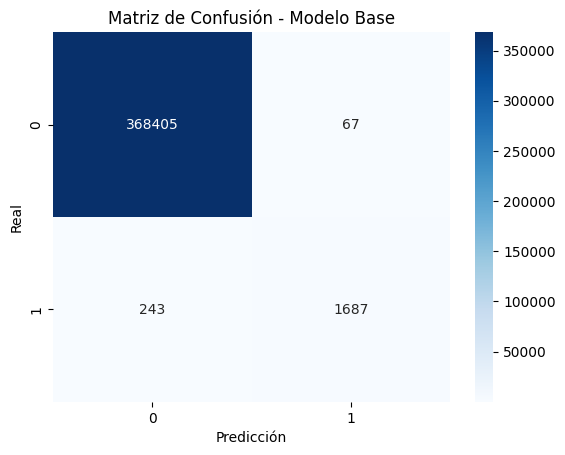

In [74]:
conf_matrix = confusion_matrix(yTest, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Modelo Base")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Sí, aunque se puede observar que hay varios falsos positivos, a comparación de los TP el modelo clasificó muy bien la mayoría y por mucho. Aunque seguramente se puede mejorar (quizas implementando algo como `scale_pos_weight ` del modelo)

In [75]:
print("\nReporte de Clasificación (Test):")
print(classification_report(yTest, test_predictions))


Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368472
           1       0.96      0.87      0.92      1930

    accuracy                           1.00    370402
   macro avg       0.98      0.94      0.96    370402
weighted avg       1.00      1.00      1.00    370402



Como bien se observó en la matriz de confusión, la métrica recall nos confirma esa falta de clasificación correcta para los fraudes, ya que tiene un valor de 0.87, por lo que se pierden fraudes debido a la sensibilidad del modelo. Lo cuál es realmente crítico y es lo que más buscamos llevar al mínimo. 